# Using Numpy, SciPy, Matplotlib

In [30]:
import numpy as np

### Numpy Basics

In [68]:
a = np.array([1, 2, 3], dtype='int16')
print(a)

[1 2 3]


In [38]:
b = np.array([[4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
print(b)

[[4. 5. 6.]
 [7. 8. 9.]]


In [39]:
#Dimension
a.ndim

1

In [40]:
b.shape

(2, 3)

In [69]:
# Type. Can also specify type using 'dtype'
a.dtype

dtype('int16')

In [70]:
# Bytes for each item
a.itemsize

2

#### Be careful when copying arrays

In [73]:
c = np.array([1, 2, 3])
# d = c    # "shallow copy": d will point to c, instead of copying c
d = np.copy(c)    # "deep copy"
d[0] = 5
print(c)
print(d)

[1 2 3]
[5 2 3]


### Generating a Sine Wave

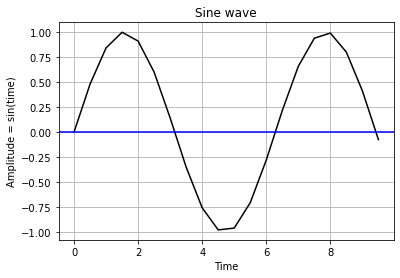

In [76]:
import matplotlib.pyplot as plt

# Set x values(time) of the sine wave
time = np.arange(0, 10, 0.5)

# Use numpy to generate corresponding amplitude of the sine wave
amplitude   = np.sin(time)

# Plot the sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude, color='k')
plt.title('Sine wave')    # Plot title
plt.xlabel('Time')    # x axis label
plt.ylabel('Amplitude = sin(time)')    # y axis label
plt.grid(True, which='both')    # Configure grid lines
plt.axhline(y=0, color='b')    # Add horizontal line across the axis

# Display the sine wave
plt.show()

### Integration using SciPy

In [77]:
import scipy.integrate as integrate
import scipy.special as special

# Computing a definite integral
# Integrate func from a to b (possibly infinite interval) using a technique from the Fortran library QUADPACK
result = integrate.quad(lambda x: x**2, 0, 4)
result    # Returns the integral and the absolute error

(21.333333333333336, 2.368475785867001e-13)

### Fourier Transformations using SciPy

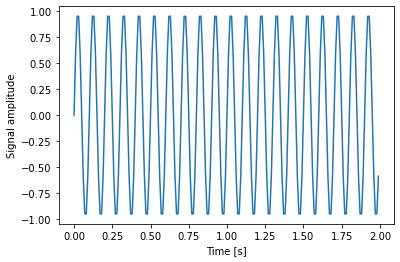

In [62]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-5.0, 110.0)

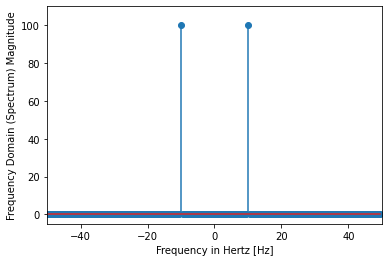

In [64]:
from scipy import fftpack

# fftpack.fft: Return DFT of real or complex sequence.
X = fftpack.fft(x)
# fftpack.fftfreq: Return the DFT sample frequencies.
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X), use_line_collection=True)
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)